In [15]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

def diff(f, var = 'x y', d = 'y'):
    d = sp.symbols(d)
    x, y = sp.symbols(var)
    
    f_sym = f(x, y)
    
    df = sp.diff(f_sym, d)
    
    df = sp.lambdify((x, y), df)
    return df

f = lambda t, y: y - t**2 + 1  

a, b = 0, 2
y0 = 0.5
h = 0.2


**Método de Euler**

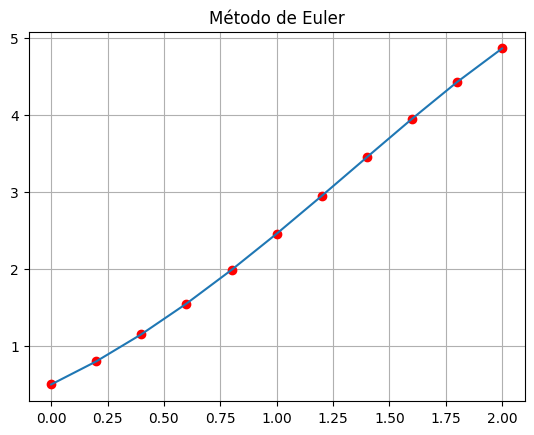

In [16]:
def euler(f, a, b, y0, n = 10):
    h = (b - a) / n
    
    t = np.zeros(n+1)
    w = np.zeros(n+1)

    t[0] = a
    w[0] = y0
    
    for i in range(1, n+1):
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
        t[i] = t[i-1] + h
    return t, w

t, w = euler(f, a, b, y0)

plt.title(f"Método de Euler")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Método de Taylor de Ordem Superior**

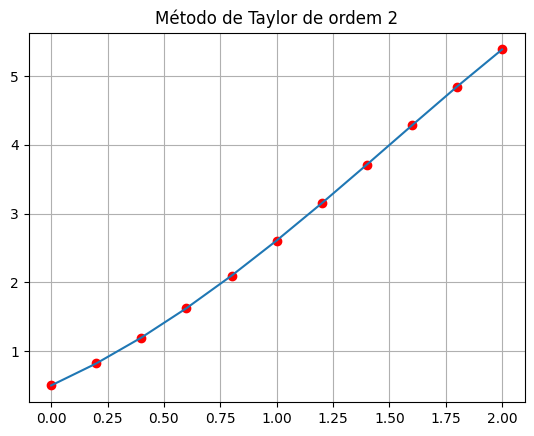

In [17]:
def taylor(d, a, b, y0, n = 10):
    h = (b - a) / n
    t = np.arange(a, b+h, h)
    w = [y0]
    
    order = len(d) + 1
    for j in range(len(t) - 1):
        taylor_sum = w[j]
        for i in range(1,order):
            taylor_sum += (d[i-1](t[j], w[j]) * h**i / math.factorial(i))
        w.append(taylor_sum)
    return t, w

d = [f,  diff(f, var = 't y')]
t, w = taylor(d, a, b, y0)

plt.title("Método de Taylor de ordem 2")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Método de Runge-Kutta**

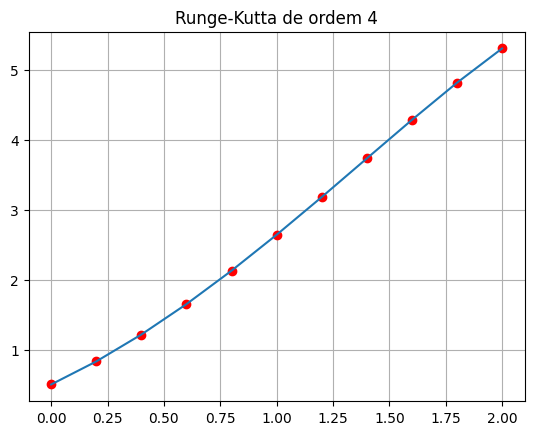

In [18]:
def runge_kutta(f, a, b, y0, n = 10):
    h = (b - a) / n 

    t = np.zeros(n+1)
    w = np.zeros(n+1)

    t[0] = a
    w[0] = y0
    
    for i in range(1,n+1):
        K1 = h * f(t[i-1], w[i-1])
        K2 = h * f(t[i-1] + h / 2, w[i-1] + K1 / 2)
        K3 = h * f(t[i-1] + h / 2, w[i-1] + K2 / 2)
        K4 = h * f(t[i-1] + h, w[i-1] + K3)
        
        w[i] = w[i-1] + (K1 + 2 * K2 + 2 * K3 + K4) / 6
        t[i] = t[i-1] + h
    
    return t, w

t, w = runge_kutta(f, a, b, y0)

plt.title("Runge-Kutta de ordem 4")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()


**Método de Runge-Kutta-Fehlberg**

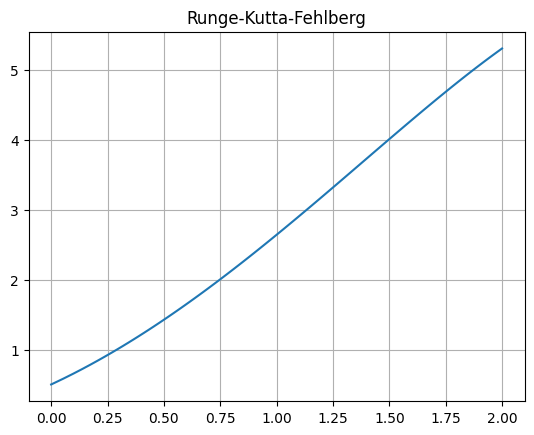

In [19]:
def runge_kutta_fehlberg(f, a, b, y0, e = 1e-5, n = 10):
    h = (b-a) / n

    ts = [a]
    ws = [y0]

    t = a
    w = y0
    
    while t < b:
        if t + h > b:
            h = b - t
        
        K1 = h * f(t, w)
        K2 = h * f(t + (1/4) * h, w + (1/4) * K1)
        K3 = h * f(t + (3/8) * h, w + (3/32) * K1 + (9/32) * K2)
        K4 = h * f(t + (12/13) * h, w + (1932/2197) * K1 - (7209/2197) * K2 + (7296/2197) * K3)
        K5 = h * f(t + h, w + (439/216) * K1 - 8 * K2 + (3680/513) * K3 - (845/4104) * K4)
        K6 = h * f(t + (1/2) * h, w - (8/27) * K1 + 2 * K2 - (3544/2565) * K3 + (1859/4104) * K4 - (11/40) * K5)
        
        R = abs( (1/360) * K1 - (128/4275) * K3 - (2197/75240) * K4 + (1/50) * K5 + (2/55) * K6 ) / h
        
        if R <= e:
            t = t + h
            w = w + 25/216 * K1 + 1408/2565 * K3 + 2197/4104 * K4 - 1/5 * K5
            ts.append(t)
            ws.append(w)
        
        delta = 0.84 * (e / R)**(1/4)
        h = h * min(max(delta, 0.1), 4.0)
    
    return ts, ws

t, w = runge_kutta_fehlberg(f, a, b, y0)

plt.title("Runge-Kutta-Fehlberg")
#plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()



In [20]:
def runge_kutta4(f, a, y0, h):
    K1 = h * f(a, y0)
    K2 = h * f(a + h/2, y0 + K1/2)
    K3 = h * f(a + h/2, y0 + K2/2)
    K4 = h * f(a + h, y0 + K3)
    
    return y0 + (K1 + 2*K2 + 2*K3 + K4) / 6.0

**Método Explícito de Adams-Bashfort**

In [21]:
def predictor(f, t, w, h, i):
    fn = f(t[i], w[i])
    fn1 = f(t[i-1], w[i-1])
    fn2 = f(t[i-2], w[i-2])
    fn3 = f(t[i-3], w[i-3])

    return w[i] + (h / 24) * (55*fn - 59*fn1 + 37*fn2 - 9*fn3)


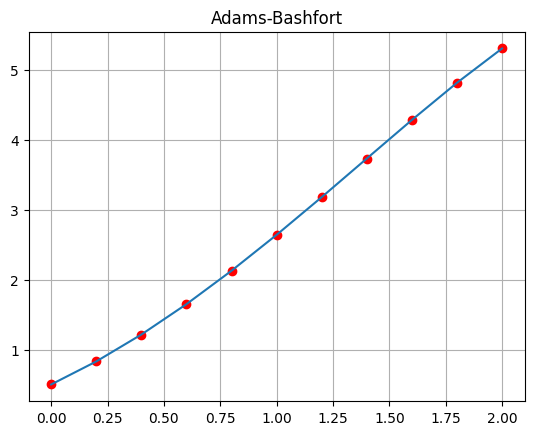

In [22]:
def adams_bashfort(f, a, b, y0, h):
    n = int((b - a) / h)
    
    t = np.zeros(n + 1)
    w = np.zeros(n + 1)

    t[0] = a
    w[0] = y0

    for i in range(3):
        w[i+1] = runge_kutta4(f, t[i], w[i], h)
        t[i+1] = t[i] + h

    for i in range(3, n):
        t[i+1] = t[i] + h
        w[i+1] = predictor(f, t, w, h, i)
    
    return t, w

t, w = adams_bashfort(f, a, b, y0, h)

plt.title("Adams-Bashfort")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()


**Método Implícito de Adams-Moulton**

In [23]:
def corrector(f, t, w, h, i):
    w_predict = predictor(f, t, w, h, i)

    fn = f(t[i+1], w_predict)
    fn1 = f(t[i], w[i])
    fn2 = f(t[i-1], w[i-1])
    fn3 = f(t[i-2], w[i-2])
    
    return w[i] + (h / 24) * (9*fn + 19*fn1 - 5*fn2 + fn3)


**Método Preditor-Corretor de Adams**

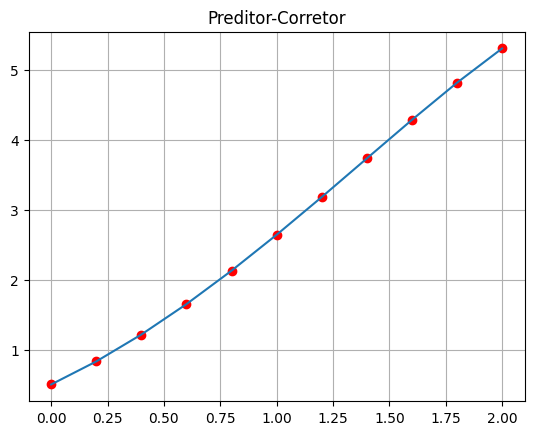

In [24]:
def predictor_corrector(f, a, b, y0, h):

    n = int((b - a) / h)
    
    t = np.zeros(n + 1)
    w = np.zeros(n + 1)

    t[0] = a
    w[0] = y0

    for i in range(3):
        w[i+1] = runge_kutta4(f, t[i], w[i], h)
        t[i+1] = t[i] + h

    for i in range(3, n):
        t[i+1] = t[i] + h
        w[i+1] = corrector(f, t, w, h, i)

    return t, w

t, w = predictor_corrector(f, a, b, y0, h)

plt.title("Preditor-Corretor")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Preditor-Corretor passo Váriavel**

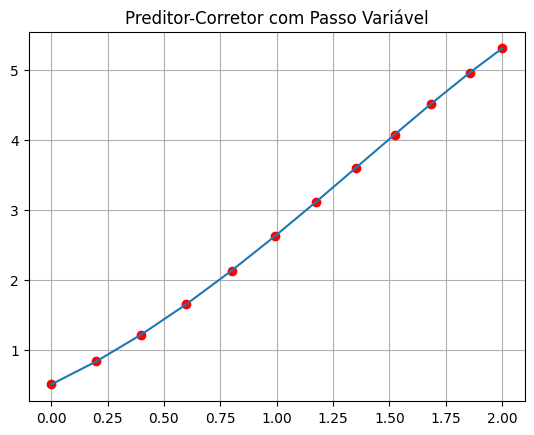

In [25]:
def h_predictor_corrector(f, a, b, y0, h0, e = 1e-5):
    t = [a]
    w = [y0]
    h = [h0]
    
    for i in range(3):
        hi = h[-1]
        t_next = t[-1] + hi
        w_next = runge_kutta4(f, t[-1], w[-1], h[-1])
        
        t.append(t_next)
        w.append(w_next)
        h.append(hi)  

    while t[-1] < b:
        i = len(t) - 1
        hi = h[-1]
        wp = predictor(f, t, w, h[-1], i)

        t_next = t[-1] + hi
        t.append(t_next)
        
        
        wc = corrector(f, t, w, h[-1], i)
        
        if abs(wc - wp) > e: 
            hi = 0.96 * hi
        else:
            hi = 1.04 * hi

        if t_next + hi > b:
            hi = b - t_next
        
        w.append(wc)
        h.append(hi)

    return t, w

t, w = h_predictor_corrector(f, a, b, y0, h)

plt.title("Preditor-Corretor com Passo Variável")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()


**Método da Extrapolação**

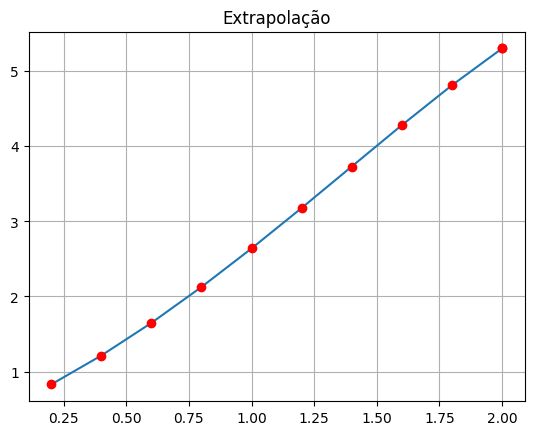

In [26]:
def extrapolation(f, a, b, y0, hmax, hmin, e = 1e-5):
    # Listas para armazenar os valores a cada iteração
    T_values = []
    W_values = []
    h_values = []

    # Passo 1: Inicialize o vetor NK
    NK = np.array([2, 4, 6, 8, 12, 16, 24, 32])
    
    # Passo 2: Inicialize variáveis
    TO = a
    WO = y0
    h = hmax
    FLAG = 1  # FLAG será usado para sair do laço no Passo 4
    NFLAG = 0
    T = TO
    
    # Passo 3: Inicie os laços para i e j
    Q = np.zeros((7, 7))  # Q_ij será calculado no Passo 3
    for i in range(7):
        for j in range(i + 1):
            # Cálculo de Q_ij
            Q[i][j] = (NK[i + 1] / NK[i]) ** 2
    
    # Passo 4: Condicional para FLAG
    while FLAG == 1:
        # Executando passos subsequentes

        # Passo 5: Inicialize k e NFLAG
        k = 1
        NFLAG = 0  # Será usado para verificar a precisão

        # Passo 6: Loop enquanto k <= 8 e NFLAG == 0
        while k <= 8 and NFLAG == 0:
            # Passo 7: Cálculos do primeiro passo
            HK = h / NK[k - 1]  # h / N_k
            T = TO
            W2 = WO
            W3 = W2 + HK * f(T, W2)  # Primeiro passo de Euler
            T = TO + HK
            
            # Passo 8: Loop para calcular os passos intermediários
            for j in range(1, NK[k - 1]):
                W1 = W2
                W2 = W3
                W3 = W1 + 2 * HK * f(T, W2)  # Método do ponto médio
                T = TO + (j + 1) * HK
            
            # Passo 9: Correção na extremidade para calcular y_k
            y_k = (W3 + W2 + HK * f(T, W3)) / 2
            
            # Passo 10: Verificação da condição k >= 2 (implementação dos Passos 11 a 13)
            if k >= 2:
                # Passo 11: Extrapolação
                j = k
                v = y_k  # Salve y_{k-1,k-1}
                
                # Passo 12: Extrapolação para calcular y_{k,k+1}, y_{k,k+2}, ...
                while j >= 2:
                    y_j_minus_1 = y_k + (y_k - y_k) / (Q[k-1,j-2] - 1)  # Extrapolação
                    y_k = y_j_minus_1
                    j -= 1
                
                # Passo 13: Teste de tolerância
                if abs(y_k - v) <= e:
                    NFLAG = 1  # y_k é aceito como o novo w
            
            # Passo 14: Atualize k para encerrar o passo 6
            k += 1

        # Passo 15: Caso contrário, faça k = k - 1
        k -= 1

        # Passo 16: Verifique NFLAG e determine o resultado
        if NFLAG == 0:
            print("Resultado rejeitado.")
            # Passo 17: Se o resultado foi rejeitado, diminua o passo h
            h /= 2
            
            # Passo 18: Verifique se h é menor que hmin
            if h < hmin:
                print("hmin excedido.")
                FLAG = 0  # Finaliza o algoritmo
                break  # Sai do laço

        else:
            # Passo 19: Aceite o resultado
            WO = y_k  # Novo valor para w aceito
            TO = TO + h  # Atualiza o tempo T
            
            # Salvando os valores
            T_values.append(TO)
            W_values.append(WO)
            h_values.append(h)
            
            # Passo 20: Verifique se TO >= b
            if TO >= b:
                FLAG = 0  # Procedimento concluído com sucesso
            elif TO + h > b:
                h = b - TO  # Ajuste final de h se necessário

    # Retorna os valores finais e as listas
    return T_values, W_values

hmin = 0.01

t, w = extrapolation(f, a, b, y0, h, hmin)

plt.plot(t, w)
plt.plot(t, w,'ro')
plt.title("Extrapolação")
plt.grid()
plt.show()


**Runge-Kutta para Sistemas de EDOs**

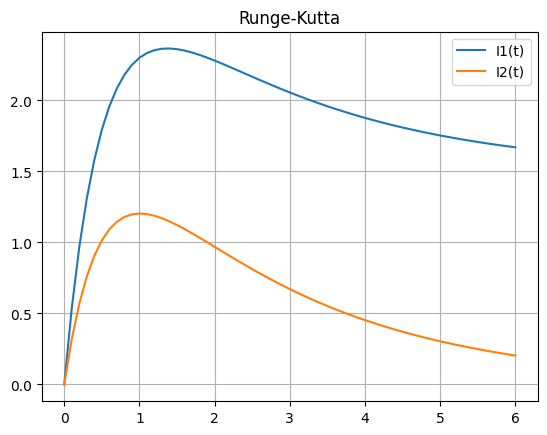

In [27]:
def runge_kutta_system(F, a, b, I0, h):
    t_values = [a]
    I_values = [I0]
    
    t = a
    I = np.array(I0)
    
    while t < b:
        if t + h > b:
            h = b - t
        
        I = runge_kutta4(F,a,I,h)
        t = t + h
        
        t_values.append(t)
        I_values.append(I)
    
    return np.array(t_values), np.array(I_values)

def I(t, i):
    I1, I2 = i
    dI1 = -4 * I1 + 3 * I2 + 6
    dI2 = -2.4 * I1 + 1.6 * I2 + 3.6
    return np.array([dI1, dI2])

I0 = [0, 0]
h = 0.1
b = 6

t, w = runge_kutta_system(I, a, b, I0, h)

I1_values = w[:, 0]
I2_values = w[:, 1]

plt.plot(t, I1_values, label='I1(t)')
plt.plot(t, I2_values, label='I2(t)')
plt.legend()
plt.title('Runge-Kutta')
plt.grid()
plt.show()


**Trapézio com Iteração de Newton**

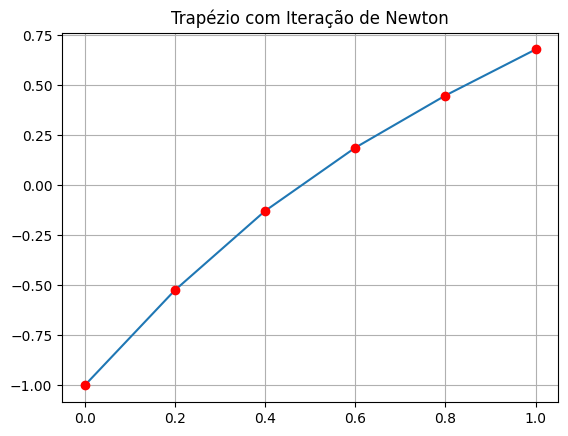

In [28]:
f = lambda t, y: 5 * sp.exp(5*t) * (y - t)**2 + 1

def trapezoidal_newton(f, df, a, b, y0, h, e = 1e-5, max_i = 100):

    t = np.arange(a, b + h, h)
    w = np.zeros_like(t)
    
    w[0] = y0
    
    for i in range(len(t) - 1):
        ti = t[i]
        wi = w[i]

        w_next = wi + h * f(ti, wi)

        for j in range(max_i):
            
            delta_w = -(w_next - wi - (h / 2) * (f(ti, wi) + f(ti + h, w_next)) / (1 - (h / 2) * df(ti + h, w_next)))
            w_next = w_next + delta_w

            
            if np.abs(delta_w) < e: break
        w[i + 1] = w_next
    
    return t, w

a, b = 0, 1
y0 = -1
h = 0.2 

t, w = trapezoidal_newton(f, diff(f,'t y'), a, b, y0, h)

plt.plot(t, w)
plt.plot(t, w, 'ro')
plt.title('Trapézio com Iteração de Newton')
plt.grid()
plt.show()
